<a href="https://colab.research.google.com/github/deepakshimpi001/DATA-SCIENCE-ASSIGNMENT/blob/main/ASSIGNMENT_7_Clustering_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1] problem statement:-
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


#A] k-means clustering:-

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("crime_data.csv")

In [ ]:
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_df=scaler.fit_transform(df.iloc[:,1:])
scale_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#find optimum number of  cluster

C:\Users\lax\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


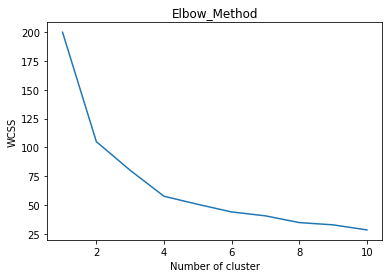

In [ ]:
#fig=plt.figure(figsize=(6,5))
wcss=[]
for i in range(1,11):
    kmodel=KMeans(n_clusters=i,random_state=0)
    kmodel.fit(scale_df)
    wcss.append(kmodel.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow_Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmodel2=KMeans(n_clusters=4,random_state=42)
kmodel2.fit(scale_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# ymeans=kmodel2.predict(scale_df)
# ymeans

In [ ]:
kmodel2.inertia_

57.55425863091106

In [ ]:
kmodel2.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [ ]:
df["k_cluster"]=kmodel2.labels_
#df["predict"]=ymeans

In [ ]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [ ]:
#conclution
df.groupby(["k_cluster"]).max()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
k_cluster,,,,,
0,Wyoming,8.5,238,89,29.3
1,Tennessee,17.4,337,66,26.9
2,Texas,15.4,335,91,46.0
3,Wisconsin,9.7,120,66,16.5


# B]Hierarcy clustering:-

In [ ]:
#dataset
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [ ]:
#scale the data
scale_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#import the required library for creating dendogram
import scipy.cluster.hierarchy as sch

#fig=plt.figure(figsize=(20,20))

In [ ]:
#creating linkage
z=sch.linkage(scale_df,method="average",metric="euclidean")

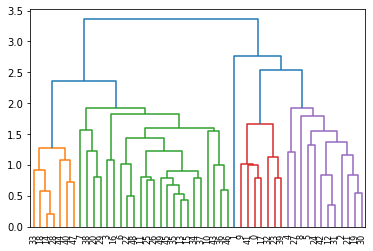

In [ ]:
#creating dendogram
dendogram=sch.dendrogram(z)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="average")

In [ ]:
y_hc=hc.fit_predict(scale_df)

In [ ]:
y_hc

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
df["h_cluster"]=y_hc

In [ ]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_cluster,h_cluster
0,Alabama,13.2,236,58,21.2,1,3
1,Alaska,10.0,263,48,44.5,2,2
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,2,1


In [ ]:
#conclusion
df.groupby("h_cluster").max()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_cluster
h_cluster,,,,,,
0,Wyoming,9.7,238,89,29.3,3
1,Texas,15.4,335,91,46.0,2
2,Alaska,10.0,263,48,44.5,2
3,Tennessee,17.4,337,66,26.9,1


#C] DBSCAN clustering:-

In [ ]:
scale_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# create an object
db = DBSCAN(eps=0.8,min_samples=4, metric='euclidean')

# fit the model
db.fit(scale_df)

DBSCAN(eps=0.8, min_samples=4)

In [ ]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [ ]:
dbcluster=pd.DataFrame(db.labels_,columns=["DBCLUSTER"])

In [ ]:
dbcluster.head()

,DBCLUSTER
0,-1
1,-1
2,-1
3,-1
4,-1


In [ ]:
db_df=pd.concat([df,dbcluster],axis=1)

In [ ]:
db_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_cluster,h_cluster,DBCLUSTER
0,Alabama,13.2,236,58,21.2,1,3,-1
1,Alaska,10.0,263,48,44.5,2,2,-1
2,Arizona,8.1,294,80,31.0,2,1,-1
3,Arkansas,8.8,190,50,19.5,1,0,-1
4,California,9.0,276,91,40.6,2,1,-1


In [ ]:
db_df.groupby("DBCLUSTER").mean()

,Murder,Assault,UrbanPop,Rape,k_cluster,h_cluster
DBCLUSTER,,,,,,
-1,9.439394,207.060606,68.303030,24.500000,1.303030,1.060606
0,4.582353,100.294118,60.176471,14.888235,1.764706,0.000000


# conclution from kmeans and Hclustering:-

# 1)Murder and Assault Rate is more in Tennessee city in us


# 2)UrbanPop and Rape Rate is more in Texas city in us

# But in DBSCAN method we havent seen any result